In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
class MeanShift:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.centroids = None

    def fit(self, data):
        centroids = data.copy()

        while True:
            new_centroids = []
            for centroid in centroids:
                in_bandwidth = data[np.sqrt(np.sum((data - centroid) ** 2, axis=1)) < self.bandwidth]
                new_centroid = np.mean(in_bandwidth, axis=0)
                new_centroids.append(new_centroid)

            if np.all(centroids == new_centroids):
                break

            centroids = np.array(new_centroids)

        self.centroids = centroids

    def predict(self, data):
        labels = np.empty(data.shape[0], dtype=np.int64)
        for i, point in enumerate(data):
            distances = np.sqrt(np.sum((self.centroids - point) ** 2, axis=1))
            labels[i] = np.argmin(distances)
        return labels

Load Iris dataset

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df = df.drop('class', axis=1)

Convert dataframe to numpy array

In [16]:
data = df.values

Fit the model

In [17]:
model = MeanShift(bandwidth=1.0)
model.fit(data)

Predict labels

In [18]:
labels = model.predict(data)

Visualize results

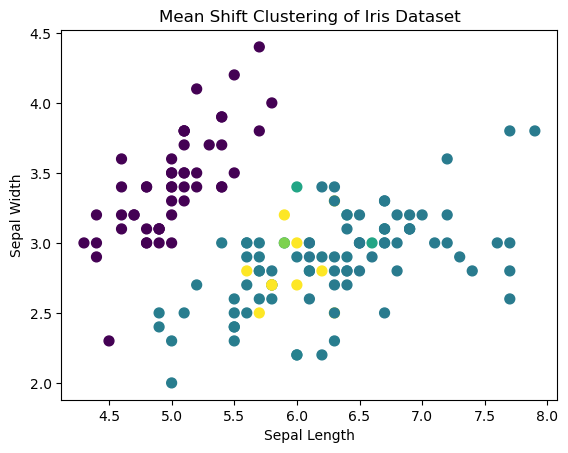

In [25]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Mean Shift Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()